<a href="https://colab.research.google.com/github/nwon24/nlp/blob/main/W8/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model performance metrics

In this notebook we will compare the baseline models, the CNN, the LSTM (with and without pretrained embeddings), and the transformer model on the same text classification task, evaluating each model on metrics such as accuracy and F1 score. The corpus will be 50000 Amazon reviews, categorised as either positive or negative reviews. These reviews will be split 80/20 for training and testing.

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



# Hyperparameters

The same hyperparameters will be used for all the neural network models. However, depending on computing resource constraints, the transformer may not be able to run for the same number of epochs as the other models.

In [2]:
corpus_file="xaa"

test_size=0.2

data=pd.read_csv(corpus_file)

# Baseline classifiers

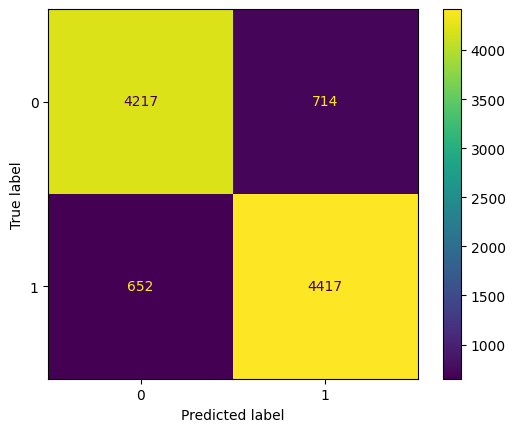

In [4]:
tfidf =TfidfVectorizer()
tfidf.fit_transform(data["text"])
trainX,testX,trainY,testY=model_selection.train_test_split(data["text"],data["label"],test_size=test_size)
Encoder=LabelEncoder()
trainY=Encoder.fit_transform(trainY)
testY=Encoder.fit_transform(testY)

trainX=tfidf.transform(trainX)
testX=tfidf.transform(testX)

SVM=svm.SVC(C=1.0,kernel="linear",degree=3,gamma="auto")
SVM.fit(trainX,trainY)
SVM_pred=SVM.predict(testX)
SVM_accuracy=accuracy_score(testY,SVM_pred)
SVM_f1=f1_score(testY,SVM_pred)
ConfusionMatrixDisplay.from_predictions(testY,SVM_pred)
plt.show()


In [5]:
print(f"SVM accuracy: {SVM_accuracy}")
print(f"SVM f1: {SVM_f1}")

SVM accuracy: 0.8634
SVM f1: 0.866078431372549


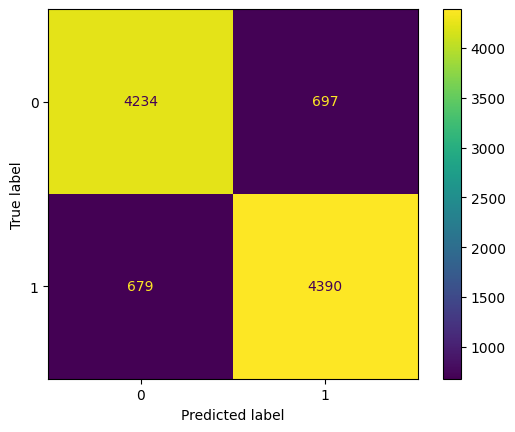

LR accuracy: 0.8624
LR f1: 0.8645135880267822


In [6]:
LR=LogisticRegression()
LR.fit(trainX,trainY)
LR_pred=LR.predict(testX)
LR_accuracy=accuracy_score(testY,LR_pred)
LR_f1=f1_score(testY,LR_pred)
ConfusionMatrixDisplay.from_predictions(testY,LR_pred)
plt.show()
print(f"LR accuracy: {LR_accuracy}")
print(f"LR f1: {LR_f1}")